- Komang
- Bayu
- Yasmin

# **Import Library**

In [3]:
# Google Drive Public File/Folder Downloader
# https://pypi.org/project/gdown/
# https://github.com/wkentaro/gdown

!pip install -q -U gdown


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tlf
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


# **Import Dataset**

- [How to download Google Drive file using Gdown in Python](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-python)
- [How to download Google Drive file using Gdown in terminal command](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-command-line)
- [How to use Python variable in Google Colab terminal command?](https://stackoverflow.com/questions/52851718/how-to-use-python-variables-in-google-colab-terminal-command)

In [5]:
rating_df = pd.read_csv('new_tourism_rating_comment.csv')
tourism_df = pd.read_csv('new_tourism_with_id_links.csv')
user_df = pd.read_csv('old_users_data.csv')
package_df = pd.read_csv('package_tourism.csv')
tourist_spots_df = pd.read_csv('tourist_spots_distance.csv')

In [6]:
print(rating_df.head())

   User_Id  Place_Id  Place_Ratings  \
0        1       179              3   
1        1       344              2   
2        1         5              5   
3        1       373              3   
4        1       101              4   

                                             Comment  
0  Candi Ratu Boko rasanya agak kurang greget, ta...  
1  Sebenarnya bisa jadi tempat bagus, tapi Pantai...  
2  Atlantis Water Adventure bikin hati senang ban...  
3  Buat refreshing, Museum Kereta Ambarawa masih ...  
4  Nyaman banget di Kampung Wisata Sosro Menduran...  


In [7]:
print(tourism_df.head())

   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                             Category  \
0          Budaya, Warisan Arsitektur   
1                 Budaya, Museum Seni   
2           Taman Hiburan, Water Park   
3  Taman Hiburan, Taman Rekreasi Anak   
4        Taman Hiburan, Taman Bertema   

                                         Description     City   Price Rating  \
0  Monumen Nasional atau yang populer disingkat d...  Jakarta   20000    4,6   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...  Jakarta       0    4,6   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Jakarta  270000    4,6   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Jakarta   10000    4,5   
4  Atlantis Water Adventure atau dikenal dengan A...

In [8]:
print(user_df.head())

   User_Id        Full_Name  Age                        Email  \
0        1    Corey Bloxsom   20       cbloxsom0@vkontakte.ru   
1        2       Koo Houtby   21             khoutby1@mac.com   
2        3  Haydon Coldrick   23  hcoldrick2@miitbeian.gov.cn   
3        4     Carlin Mohun   21             cmohun3@usgs.gov   
4        5       Ilise Book   20             ibook4@ameblo.jp   

           Password  
0        zO5"~7?s4}  
1          jV4<@8~K  
2  pY1~VsZ)8!Exp~x!  
3     wQ3_g4=H%tjC\  
4  qK4#&WsyAT$te!Pf  


In [9]:
print(package_df.head())

   Package     City         Place_Tourism1      Place_Tourism2  \
0        1  Jakarta      Pasar Tanah Abang        Taman Ayodya   
1        2  Jakarta      Pasar Tanah Abang  Pasar Taman Puring   
2        3  Jakarta  Perpustakaan Nasional               Monas   
3        4  Jakarta           Pulau Tidung      Pulau Bidadari   
4        5  Jakarta  Museum Satria Mandala       Museum Wayang   

          Place_Tourism3                                     Place_Tourism4  \
0         Museum Tekstil                                                NaN   
1   Pasar Petak Sembilan                                                NaN   
2        Masjid Istiqlal                                                NaN   
3             Pulau Pari                                      Pulau Pramuka   
4  Museum Bahari Jakarta  Museum Macan (Modern and Contemporary Art in N...   

  Place_Tourism5  
0            NaN  
1            NaN  
2            NaN  
3  Pulau Pelangi  
4            NaN  


In [10]:
rating_df 

,User_Id,Place_Id,Place_Ratings,Comment
0,1,179,3,"Candi Ratu Boko rasanya agak kurang greget, ta..."
1,1,344,2,"Sebenarnya bisa jadi tempat bagus, tapi Pantai..."
2,1,5,5,Atlantis Water Adventure bikin hati senang ban...
3,1,373,3,"Buat refreshing, Museum Kereta Ambarawa masih ..."
4,1,101,4,Nyaman banget di Kampung Wisata Sosro Menduran...
...,...,...,...,...
9592,300,425,2,Aku sebenernya berharap lebih dari Waterpark K...
9593,300,64,4,Nyaman banget di Museum Sasmita Loka Ahmad Yan...
9594,300,311,3,"Masih banyak tempat lain yang lebih menarik, t..."
9595,300,279,4,Udah oke banget sih Masjid Agung Trans Studio ...


In [11]:
tourism_df 

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
0,1,Monumen Nasional,"Budaya, Warisan Arsitektur",Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,"4,6",15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,images_output\Monumen Nasional\Monumen Nasiona...,images_output\Monumen Nasional\Monumen Nasiona...,images_output\Monumen Nasional\Monumen Nasiona...
1,2,Kota Tua,"Budaya, Museum Seni","Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,"4,6",90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,images_output\Kota Tua\Kota Tua_0.jpg,images_output\Kota Tua\Kota Tua_1.jpg,NaN
2,3,Dunia Fantasi,"Taman Hiburan, Water Park",Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,"4,6",360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,images_output\Dunia Fantasi\Dunia Fantasi_0.jpg,images_output\Dunia Fantasi\Dunia Fantasi_1.png,images_output\Dunia Fantasi\Dunia Fantasi_2.jpg
3,4,Taman Mini Indonesia Indah (TMII),"Taman Hiburan, Taman Rekreasi Anak",Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta,10000,"4,5",NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...
4,5,Atlantis Water Adventure,"Taman Hiburan, Taman Bertema",Atlantis Water Adventure atau dikenal dengan A...,Jakarta,94000,"4,5",60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,images_output\Atlantis Water Adventure\Atlanti...,images_output\Atlantis Water Adventure\Atlanti...,images_output\Atlantis Water Adventure\Atlanti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,"Budaya, Museum Sejarah",Museum Negeri Mpu Tantular adalah sebuah museu...,Surabaya,2000,"4,4",45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,images_output\Museum Mpu Tantular\Museum Mpu T...,images_output\Museum Mpu Tantular\Museum Mpu T...,NaN
433,434,Taman Bungkul,"Taman Hiburan, Taman Edukasi",Taman Bungkul adalah taman wisata kota yang te...,Surabaya,0,"4,6",NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,images_output\Taman Bungkul\Taman Bungkul_0.jpg,images_output\Taman Bungkul\Taman Bungkul_1.jpg,images_output\Taman Bungkul\Taman Bungkul_2.jpg
434,435,Taman Air Mancur Menari Kenjeran,"Taman Hiburan, Water Park",Air mancur menari atau dancing fountain juga a...,Surabaya,0,"4,4",45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,images_output\Taman Air Mancur Menari Kenjeran...,images_output\Taman Air Mancur Menari Kenjeran...,NaN
435,436,Taman Flora Bratang Surabaya,"Taman Hiburan, Taman Rekreasi Anak",Taman Flora adalah salah satu taman kota di Su...,Surabaya,0,"4,6",NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,images_output\Taman Flora Bratang Surabaya\Tam...,NaN,NaN


In [12]:
user_df 

,User_Id,Full_Name,Age,Email,Password
0,1,Corey Bloxsom,20,cbloxsom0@vkontakte.ru,"zO5""~7?s4}"
1,2,Koo Houtby,21,khoutby1@mac.com,jV4<@8~K
2,3,Haydon Coldrick,23,hcoldrick2@miitbeian.gov.cn,pY1~VsZ)8!Exp~x!
3,4,Carlin Mohun,21,cmohun3@usgs.gov,wQ3_g4=H%tjC\
4,5,Ilise Book,20,ibook4@ameblo.jp,qK4#&WsyAT$te!Pf
...,...,...,...,...,...
295,296,Gaye Sopper,31,gsopper87@samsung.com,wV2~B_#fQ3iZ\skK
296,297,Rockey Bruckstein,39,rbruckstein88@cnet.com,jR9>!r2C*SR
297,298,Noland Jopke,38,njopke89@dmoz.org,"tZ7{J=,Z)M?x,=#q"
298,299,Catie Clyant,27,cclyant8a@drupal.org,uX7/q_*HY~NW


In [13]:
package_df 

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
...,...,...,...,...,...,...,...
95,96,Surabaya,Ekowisata Mangrove Wonorejo,Taman Harmoni Keputih,Taman Kunang-Kunang,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank
96,97,Surabaya,Ciputra Waterpark,Kenjeran Park,Kebun Binatang Surabaya,Food Junction Grand Pakuwon,Atlantis Land Surabaya
97,98,Surabaya,Museum Kesehatan Dr. Adhyatma,Patung Buddha Empat Rupa,Taman Hiburan Rakyat,Taman Bungkul,Taman Flora Bratang Surabaya
98,99,Surabaya,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank,Surabaya Museum (Gedung Siola),Museum Mpu Tantular,Taman Air Mancur Menari Kenjeran


In [14]:
tourist_spots_df 

,Place_Id_Source,Place_Id_Target,Distance
0,1,2,4.34
1,1,3,5.61
2,1,4,16.00
3,1,5,5.85
4,1,6,7.30
...,...,...,...
190527,437,432,2.23
190528,437,433,21.41
190529,437,434,5.49
190530,437,435,4.20


# **Data Cleaning**


In [15]:
missing_values = {
    "tourism_data_missing": package_df.isnull().sum(),
    "tourism_rating_missing": rating_df.isnull().sum(),
    "new_tourism_with_id_missing": tourism_df.isnull().sum(),
    "user_missing": user_df.isnull().sum()
}

In [16]:
missing_values

{'tourism_data_missing': Package            0
 City               0
 Place_Tourism1     0
 Place_Tourism2     0
 Place_Tourism3     0
 Place_Tourism4    34
 Place_Tourism5    61
 dtype: int64,
 'tourism_rating_missing': User_Id          0
 Place_Id         0
 Place_Ratings    0
 Comment          0
 dtype: int64,
 'new_tourism_with_id_missing': Place_Id          0
 Place_Name        0
 Category          0
 Description       0
 City              0
 Price             0
 Rating            0
 Time_Minutes    232
 Coordinate        0
 Lat               0
 Long              0
 Img_Path_0        0
 Img_Path_1       79
 Img_Path_2      271
 dtype: int64,
 'user_missing': User_Id      0
 Full_Name    0
 Age          0
 Email        0
 Password     0
 dtype: int64}

In [17]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({
    'Time_Minutes': tourism_df['Time_Minutes'].median()
}, inplace=True)

In [18]:
rating_df['Place_Ratings']

0       3
1       2
2       5
3       3
4       4
       ..
9592    2
9593    4
9594    3
9595    4
9596    2
Name: Place_Ratings, Length: 9597, dtype: int64

In [19]:
tourism_df.isnull().sum()
tourism_df

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
0,1,Monumen Nasional,"Budaya, Warisan Arsitektur",Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,"4,6",15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,images_output\Monumen Nasional\Monumen Nasiona...,images_output\Monumen Nasional\Monumen Nasiona...,images_output\Monumen Nasional\Monumen Nasiona...
1,2,Kota Tua,"Budaya, Museum Seni","Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,"4,6",90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,images_output\Kota Tua\Kota Tua_0.jpg,images_output\Kota Tua\Kota Tua_1.jpg,NaN
2,3,Dunia Fantasi,"Taman Hiburan, Water Park",Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,"4,6",360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,images_output\Dunia Fantasi\Dunia Fantasi_0.jpg,images_output\Dunia Fantasi\Dunia Fantasi_1.png,images_output\Dunia Fantasi\Dunia Fantasi_2.jpg
3,4,Taman Mini Indonesia Indah (TMII),"Taman Hiburan, Taman Rekreasi Anak",Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta,10000,"4,5",60.0,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...,images_output\Taman Mini Indonesia Indah (TMII...
4,5,Atlantis Water Adventure,"Taman Hiburan, Taman Bertema",Atlantis Water Adventure atau dikenal dengan A...,Jakarta,94000,"4,5",60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,images_output\Atlantis Water Adventure\Atlanti...,images_output\Atlantis Water Adventure\Atlanti...,images_output\Atlantis Water Adventure\Atlanti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,"Budaya, Museum Sejarah",Museum Negeri Mpu Tantular adalah sebuah museu...,Surabaya,2000,"4,4",45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,images_output\Museum Mpu Tantular\Museum Mpu T...,images_output\Museum Mpu Tantular\Museum Mpu T...,NaN
433,434,Taman Bungkul,"Taman Hiburan, Taman Edukasi",Taman Bungkul adalah taman wisata kota yang te...,Surabaya,0,"4,6",60.0,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,images_output\Taman Bungkul\Taman Bungkul_0.jpg,images_output\Taman Bungkul\Taman Bungkul_1.jpg,images_output\Taman Bungkul\Taman Bungkul_2.jpg
434,435,Taman Air Mancur Menari Kenjeran,"Taman Hiburan, Water Park",Air mancur menari atau dancing fountain juga a...,Surabaya,0,"4,4",45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,images_output\Taman Air Mancur Menari Kenjeran...,images_output\Taman Air Mancur Menari Kenjeran...,NaN
435,436,Taman Flora Bratang Surabaya,"Taman Hiburan, Taman Rekreasi Anak",Taman Flora adalah salah satu taman kota di Su...,Surabaya,0,"4,6",60.0,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,images_output\Taman Flora Bratang Surabaya\Tam...,NaN,NaN


Model Develompement Recommendation System

Content Based Filtering

Create tourism_one_hot_df

In [20]:
def get_one_hot_tourism_data(tourism_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
  """
  Preprocess the tourism dataframe by applying one-hot encoding to 'Category' and 'City',
  and dropping irrelevant columns.

  Args:
      tourism_df (pd.DataFrame): Original tourism dataframe.

  Returns:
      pd.DataFrame: Processed tourism dataframe with one-hot encoding applied.
  """
  # One-hot encoding untuk kolom Category dan City
  categories_one_hot = tourism_df['Category'].str.get_dummies(sep=', ')
  country_one_hot = tourism_df['City'].str.get_dummies()

  # Gabungkan dataframe asli dengan hasil one-hot encoding
  new_tourism_df = pd.concat([tourism_df, country_one_hot, categories_one_hot], axis=1)

  # Drop kolom yang tidak relevan
  tourism_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'Description', 'City', 'Coordinate',
    'Lat', 'Long', 'Img_Path_0', 'Img_Path_1', 'Img_Path_2'
  ])

  return tourism_one_hot_df, new_tourism_df

In [21]:
tourism_one_hot_df, new_tourism_df = get_one_hot_tourism_data(tourism_df)
tourism_one_hot_df

,Place_Id,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta,Bahari,...,Taman Hiburan,Taman Laut,Taman Nasional,Taman Rekreasi Anak,Teater & Pertunjukan,Tempat Ibadah,Tempat Menyelam,Toko Cinderamata,Warisan Arsitektur,Water Park
0,1,20000,"4,6",15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,"4,6",90.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,270000,"4,6",360.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,10000,"4,5",60.0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,94000,"4,5",60.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,2000,"4,4",45.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
433,434,0,"4,6",60.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
434,435,0,"4,4",45.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
435,436,0,"4,6",60.0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [22]:
# Convert numeric columns with commas to proper float format
tourism_one_hot_df = tourism_one_hot_df.replace(',', '.', regex=True)
tourism_one_hot_df = tourism_one_hot_df.apply(pd.to_numeric, errors='coerce')


Create average_user_rating_df

In [23]:
def get_average_user_rating(new_tourism_df: pd.DataFrame, rating_df: pd.DataFrame) -> pd.DataFrame:
  """
  Calculate the average user ratings for tourism categories.

  This function preprocesses the tourism and rating dataframes to calculate
  the average ratings given by each user for various tourism categories.

  Args:
    new_tourism_df (pd.DataFrame): Dataframe containing tourism place
        information. It must include a 'Place_Id' column and one-hot
        encoded columns for tourism categories.
    rating_df (pd.DataFrame): Dataframe containing user ratings for places
      with columns 'Place_Id', 'User_Id', and 'Place_Ratings'.

  Returns:
    pd.DataFrame: A dataframe with average user ratings for each tourism
      category. The resulting dataframe includes:
        - 'User_Id': Unique identifier for users.
        - Columns corresponding to tourism categories with average ratings
          for each user.
    """

  # Daftar kategori
  categories = [
    'Bahari', 'Budaya', 'Cagar Alam', 'Hutan Lindung', 'Kebun Binatang',
    'Mall', 'Museum Sejarah', 'Museum Seni', 'Pantai', 'Pasar Tradisional',
    'Pulau', 'Pusat Perbelanjaan', 'Pusat Perbelanjaan Mewah', 'Situs Sejarah',
    'Suaka Margasatwa', 'Taman Air', 'Taman Bertema', 'Taman Edukasi',
    'Taman Hiburan', 'Taman Laut', 'Taman Nasional', 'Taman Rekreasi Anak',
    'Teater & Pertunjukan', 'Tempat Ibadah', 'Tempat Menyelam', 'Toko Cinderamata',
    'Warisan Arsitektur', 'Water Park'
  ]

  # Hapus kolom yang tidak diperlukan dari new_tourism_df
  tourism_category_only_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'Description', 'City', 'Price',
    'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long',
    'Img_Path_0', 'Img_Path_1', 'Img_Path_2', 'Bandung',
    'Jakarta', 'Semarang', 'Surabaya', 'Yogyakarta'
  ])

  # Gabungkan rating_df dengan tourism_category_only_one_hot_df berdasarkan 'Place_Id'
  rating_one_hot_df = rating_df.merge(
      tourism_category_only_one_hot_df, how='inner', on='Place_Id'
  )

  # Salin rating_one_hot_df untuk perhitungan
  rating_not_one_hot_df = rating_one_hot_df.copy()

  # Kalikan rating dengan setiap kategori untuk mendapatkan skor berbobot
  for category in categories:
    rating_not_one_hot_df[category] *= rating_not_one_hot_df['Place_Ratings']

  # Hitung total rating dan jumlah rating per kategori per pengguna
  total_count = rating_one_hot_df.groupby('User_Id')[categories].sum()
  total_rating = rating_not_one_hot_df.groupby('User_Id')[categories].sum()

  # Rata-rata rating untuk setiap kategori
  average_ratings = (total_rating / total_count).fillna(0).reset_index()

  # Tambahkan kolom User_Id ke hasil akhir
  average_user_rating_df = pd.concat([total_count.reset_index()[['User_Id']],
                                      average_ratings[categories]], axis=1)

  return average_user_rating_df

In [24]:
average_user_rating_df = get_average_user_rating(new_tourism_df, rating_df)
average_user_rating_df

,User_Id,Bahari,Budaya,Cagar Alam,Hutan Lindung,Kebun Binatang,Mall,Museum Sejarah,Museum Seni,Pantai,...,Taman Hiburan,Taman Laut,Taman Nasional,Taman Rekreasi Anak,Teater & Pertunjukan,Tempat Ibadah,Tempat Menyelam,Toko Cinderamata,Warisan Arsitektur,Water Park
0,1,2.000000,3.500000,3.444444,2.000000,5.0,0.0,3.750000,2.000000,0.0,...,3.800000,2.0,4.50,3.500000,2.500000,2.000000,0.000000,4.0,4.000000,0.000000
1,2,2.000000,3.444444,2.909091,2.333333,5.0,0.0,3.250000,5.000000,2.0,...,3.500000,0.0,3.00,2.666667,3.666667,4.000000,0.000000,0.0,2.000000,4.000000
2,3,5.000000,3.230769,4.000000,5.000000,0.0,0.0,3.200000,2.666667,0.0,...,3.000000,0.0,4.00,2.600000,3.500000,5.000000,5.000000,0.0,3.800000,4.000000
3,4,5.000000,3.076923,3.750000,3.000000,3.0,0.0,2.500000,5.000000,0.0,...,3.571429,5.0,5.00,4.000000,3.000000,0.000000,0.000000,0.0,2.714286,3.000000
4,5,3.500000,3.500000,3.000000,3.000000,2.0,0.0,3.200000,4.000000,5.0,...,3.500000,0.0,3.00,3.200000,3.000000,5.000000,0.000000,5.0,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2.000000,3.000000,3.333333,0.000000,4.0,0.0,1.000000,3.000000,0.0,...,3.000000,2.0,0.00,2.500000,4.000000,2.500000,0.000000,2.0,2.500000,3.000000
296,297,3.333333,3.090909,3.000000,5.000000,2.5,0.0,2.500000,4.000000,3.5,...,4.125000,0.0,3.00,3.500000,4.000000,2.333333,3.333333,0.0,2.000000,0.000000
297,298,2.750000,4.200000,3.444444,0.000000,1.0,0.0,4.333333,4.000000,1.0,...,4.000000,0.0,3.75,5.000000,4.000000,2.000000,0.000000,0.0,0.000000,3.333333
298,299,2.000000,3.083333,2.250000,2.000000,0.0,0.0,2.800000,0.000000,0.0,...,2.428571,2.0,2.50,3.000000,2.666667,4.000000,0.000000,3.0,2.666667,1.000000


Persiapan Data untuk Model

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Drop non-relevant columns for training (e.g., Place_Id)
X = tourism_one_hot_df.drop(columns=['Place_Id'])

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 (fallback value)
X = X.fillna(0)

# Normalize data column-wise
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_normalized, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



Shape of X_train: (349, 36)
Shape of X_test: (88, 36)


In [26]:
print(tourism_one_hot_df.columns)

Index(['Place_Id', 'Price', 'Rating', 'Time_Minutes', 'Bandung', 'Jakarta',
       'Semarang', 'Surabaya', 'Yogyakarta', 'Bahari', 'Budaya', 'Cagar Alam',
       'Hutan Lindung', 'Kebun Binatang', 'Mall', 'Museum Sejarah',
       'Museum Seni', 'Pantai', 'Pasar Tradisional', 'Pulau',
       'Pusat Perbelanjaan', 'Pusat Perbelanjaan Mewah', 'Situs Sejarah',
       'Suaka Margasatwa', 'Taman Air', 'Taman Bertema', 'Taman Edukasi',
       'Taman Hiburan', 'Taman Laut', 'Taman Nasional', 'Taman Rekreasi Anak',
       'Teater & Pertunjukan', 'Tempat Ibadah', 'Tempat Menyelam',
       'Toko Cinderamata', 'Warisan Arsitektur', 'Water Park'],
      dtype='object')


In [27]:
# Drop non-relevant columns, if they exist
if 'Place_Id' in tourism_one_hot_df.columns:
    tourism_one_hot_df = tourism_one_hot_df.drop(columns=['Place_Id'])



Karena tourism_one_hot_df memiliki 37 kolom, sedangkan model Anda mengharapkan 36 fitur sebagai input, maka ada 1 kolom tambahan yang perlu dihapus.

Arsitektur Model

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define the model architecture
model_cbf = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dropout(0.2),  # Regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dense(X_train.shape[1], activation='sigmoid')  # Output layer, matches target data
])

model_cbf.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_cbf.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,332 (59.89 KB)

 Trainable params: 15,332 (59.89 KB)

 Non-trainable params: 0 (0.00 B)

Melatih Model

In [111]:
# Train the model
history = model_cbf.fit(
    X_train, X_train,  
    epochs=20,
    batch_size=16,
    validation_data=(X_test, X_test),
    verbose=1
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0176 - loss: 0.2260 - val_accuracy: 0.0000e+00 - val_loss: 0.1672
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0174 - loss: 0.1400 - val_accuracy: 0.0000e+00 - val_loss: 0.0804
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0074 - loss: 0.0767 - val_accuracy: 0.0000e+00 - val_loss: 0.0684
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0195 - loss: 0.0643 - val_accuracy: 0.0114 - val_loss: 0.0619
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0776 - loss: 0.0582 - val_accuracy: 0.1136 - val_loss: 0.0545
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2235 - loss: 0.0520 - val_accuracy: 0.2045 - val_loss: 0.0475
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - loss: 0.0429 - val_accuracy: 0.2273 - val_loss: 0.0414
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3268 - loss: 0.0364 - val_accuracy: 0.3523

In [116]:
model.save("cbf_model.h5")

Visualisasi Hasil Pelatihan


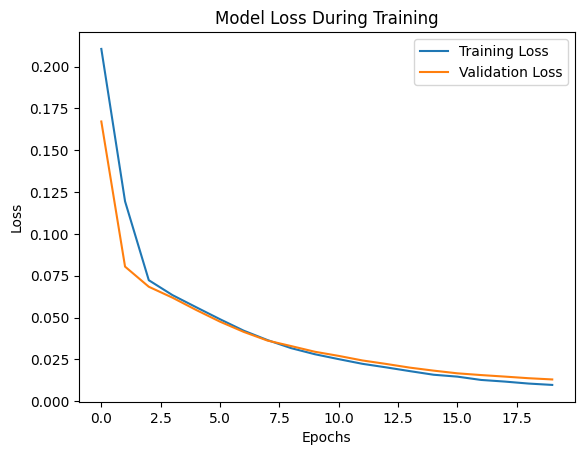

In [112]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Cek untuk meyakinkan ada apa saja di place name

In [42]:
tourism_df.columns
tourism_df['Place_Name'].head()


0                     Monumen Nasional
1                             Kota Tua
2                        Dunia Fantasi
3    Taman Mini Indonesia Indah (TMII)
4             Atlantis Water Adventure
Name: Place_Name, dtype: object

Fungsi untuk Menghasilkan Rekomendasi

In [76]:
def generate_recommendations(place_name, model, tourism_one_hot_df, tourism_df, k=5):
    """
    Generate content-based recommendations using the trained model.

    Args:
    - place_name (str): The name of the place to base recommendations on.
    - model (tf.keras.Model): The trained model.
    - one_hot_data (pd.DataFrame): The one-hot encoded dataframe without 'Place_Name'.
    - tourism_df (pd.DataFrame): The original dataframe with 'Place_Name'.
    - k (int): Number of recommendations.

    Returns:
    - pd.DataFrame: Recommended places with similarity scores and names.
    """
    # Validate if the place_name exists in the dataset
    if place_name not in tourism_df['Place_Name'].values:
        raise ValueError(f"Place name '{place_name}' not found in the dataset.")
    
    # Get the index of the place
    place_idx = tourism_df[tourism_df['Place_Name'] == place_name].index[0]
    
    # Get the input vector for the place
    input_vector = tourism_one_hot_df.iloc[place_idx].values.astype('float32').reshape(1, -1)
    
    # Predict using the model
    predicted_vector = model.predict(input_vector)
    
    # Compute similarity scores
    similarity_scores = cosine_similarity(predicted_vector, tourism_one_hot_df.values.astype('float32')).flatten()
    
    # Get the top-k most similar places
    similar_indices = similarity_scores.argsort()[-k:][::-1]
    
    # Return the top-k recommendations with 'Place_Name'
    recommendations = tourism_df.iloc[similar_indices][['Place_Name']].copy()
    recommendations['Similarity_Score'] = similarity_scores[similar_indices]
    return recommendations


Cek model input shape sudah sesuai dengan kolom tourism one hot

In [77]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 36)


In [78]:
print("Shape of tourism_one_hot_df:", tourism_one_hot_df.shape)


Shape of tourism_one_hot_df: (437, 36)


Sudah sesuai sama sama 36

In [79]:
place_to_recommend = "Monumen Nasional"  # Pastikan nama ini ada dalam dataset
recommendations = generate_recommendations(place_to_recommend, model, tourism_one_hot_df, tourism_df, k=10)
recommendations[['Place_Name', 'Similarity_Score']]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,Place_Name,Similarity_Score
43,Monumen Selamat Datang,0.254866
102,Tugu Pal Putih Jogja,0.209734
427,Monumen Bambu Runcing Surabaya,0.206065
421,Monumen Jalesveva Jayamahe,0.206065
408,Rumah Batik,0.201954
25,Pecinan Glodok,0.182544
398,Taman Pelangi,0.154667
78,Taman Spathodea,0.130257
104,Candi Donotirto,0.122094
399,Hutan Bambu Keputih,0.119584


REKOMENDASI BERDASARKAN KATEGORI

In [80]:
def generate_recommendations_by_category(category, model, one_hot_data, tourism_df, k=5):
    """
    Generate content-based recommendations based on a category.

    Args:
    - category (str): The category to base recommendations on.
    - model (tf.keras.Model): The trained model.
    - one_hot_data (pd.DataFrame): The one-hot encoded dataframe without 'Place_Name'.
    - tourism_df (pd.DataFrame): The original dataframe with 'Place_Name' and 'Category'.
    - k (int): Number of recommendations.

    Returns:
    - pd.DataFrame: Recommended places with similarity scores and additional details.
    """
    # Validate if the category exists in the dataset
    if category not in tourism_df['Category'].values:
        raise ValueError(f"Category '{category}' not found in the dataset.")
    
    # Filter tourism_df to include only rows with the given category
    filtered_places = tourism_df[tourism_df['Category'].str.contains(category, case=False, na=False)]
    
    # Get indices of filtered places
    filtered_indices = filtered_places.index
    
    # Create an average feature vector for the given category
    category_vector = one_hot_data.iloc[filtered_indices].mean(axis=0).values.astype('float32').reshape(1, -1)
    
    # Predict using the model
    predicted_vector = model.predict(category_vector)
    
    # Compute similarity scores with all destinations
    similarity_scores = cosine_similarity(predicted_vector, one_hot_data.values.astype('float32')).flatten()
    
    # Get the top-k most similar places
    similar_indices = similarity_scores.argsort()[-k:][::-1]
    
    # Return the top-k recommendations with additional details
    recommendations = tourism_df.iloc[similar_indices].copy()
    recommendations['Similarity_Score'] = similarity_scores[similar_indices]
    return recommendations



In [81]:
# Example: Generate recommendations
category_to_recommend = "Budaya"  # Replace with any category in the dataset
recommendations_by_category = generate_recommendations_by_category(category_to_recommend, model, tourism_one_hot_df, tourism_df, k=5)

# Display recommendations with additional details
recommendations_by_category[['Place_Name', 'City', 'Category', 'Similarity_Score']]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Place_Name,City,Category,Similarity_Score
43,Monumen Selamat Datang,Jakarta,"Budaya, Warisan Arsitektur",0.254866
102,Tugu Pal Putih Jogja,Yogyakarta,"Budaya, Situs Sejarah, Museum Sejarah, Situs S...",0.209734
427,Monumen Bambu Runcing Surabaya,Surabaya,"Budaya, Warisan Arsitektur",0.206065
421,Monumen Jalesveva Jayamahe,Surabaya,"Budaya, Museum Seni",0.206065
408,Rumah Batik,Surabaya,"Budaya, Teater & Pertunjukan",0.201954
